In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("../../dataset/DM_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   hot                          25192 non-null  int64  
 9   num_failed_logins            25192 non-null  int64  
 10  logged_in                    25192 non-null  int64  
 11  num_compromised              25192 non-null  int64  
 12  root_shell                   25192 non-null  int64  
 13  su_attempted    

In [2]:
X, y = df.drop(columns=["class", "index_num"]), df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_vector = list()

for m_depth_iter in range(1, 21):
    clf_item = RandomForestClassifier(n_estimators=100, max_depth=m_depth_iter, random_state=0, criterion='entropy')
    clf_item.fit(X_train, y_train)
    clf_vector.append(clf_item)

plot_vector = []
for clf_item in clf_vector:
    clf_y_pred = clf_item.predict(X_test)
    accuracy = accuracy_score(y_test, clf_y_pred)
    plot_vector.append([clf_item.max_depth, accuracy])

plot_vec = pd.DataFrame(plot_vector)
plot_vec.rename(columns={0: "depth", 1: "accuracy"})

,depth,accuracy
0,1,0.902223
1,2,0.951178
2,3,0.973538
3,4,0.978566
4,5,0.984255
5,6,0.989944
6,7,0.992855
7,8,0.994311
8,9,0.996031
9,10,0.996692


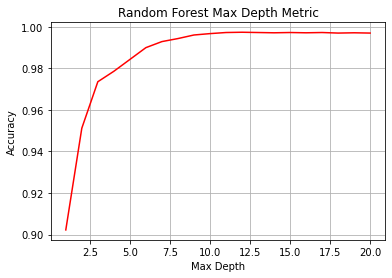

max depth at the level of 12


In [4]:
depth_x = plot_vec[:][0]
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Max Depth Metric')
plt.plot(depth_x, plot_vec[:][1], 'r', label='accuracy')
plt.grid(True)
plt.savefig('./output/random forest max depth.png')
plt.show()

idx_max = plot_vec.idxmax(0)
print(f"max depth at the level of {idx_max[1]+1}")

In [5]:
from sklearn.metrics import confusion_matrix
clf = clf_vector[idx_max[1]]
clf_y_pred = clf.predict(X_test)

conf_mat = confusion_matrix(y_test, clf_y_pred)
accuracy = (conf_mat[0][0]+conf_mat[1][1])/conf_mat.sum()
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
f1 = 2*(precision*recall)/(precision+recall)
error_rate = (conf_mat[0][1]+conf_mat[1][0])/conf_mat.sum()



print(f'accuracy:   {accuracy}')
print(f'precision:  {precision}')
print(f'racall:     {recall}')
print(f'f1 score:   {f1}')
print(f'error rate: {error_rate}')

accuracy:   0.9973537973008733
precision:  0.9965525732578183
racall:     0.9985196150999259
f1 score:   0.997535124476214
error rate: 0.0026462026991267533


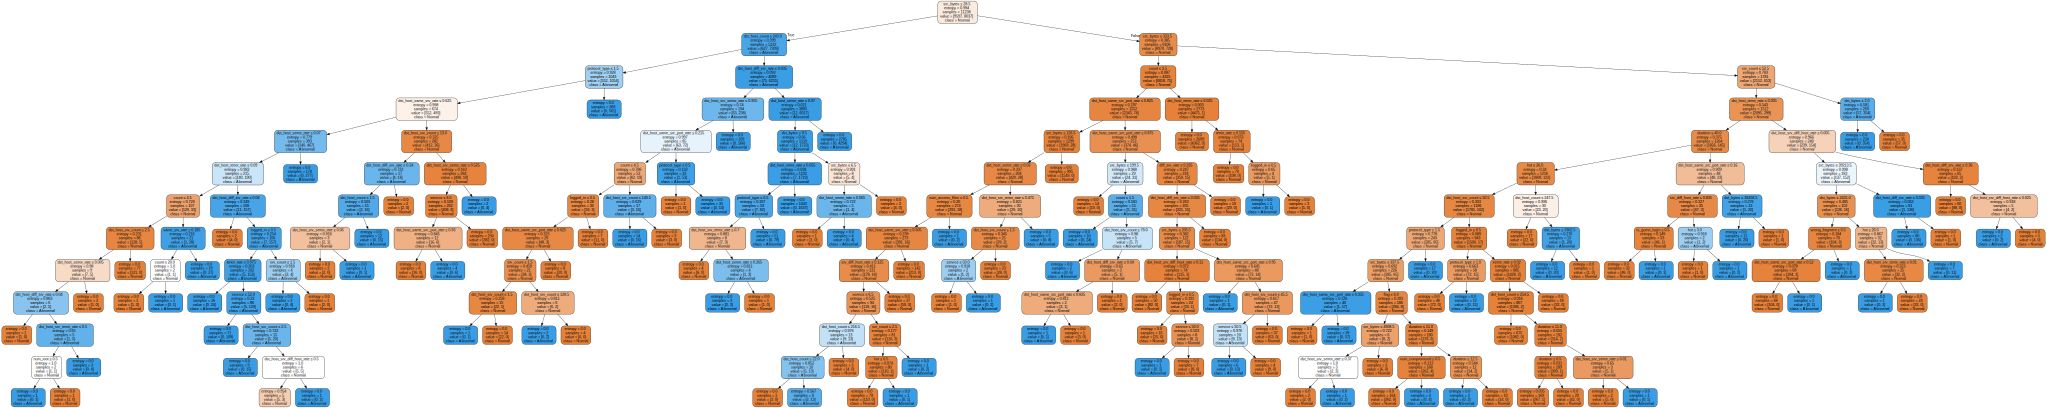

In [6]:
from IPython import display
from sklearn import tree
import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:\\Users\\s\\anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz' 
# 시각화
dot_data = tree.export_graphviz(clf.estimators_[5],
                               out_file = None,
                               feature_names = X_train.columns,
                               class_names = ["Normal", "Abnormal"],
                               filled = True,
                               rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('./output/random forest', format='jpg')
graph

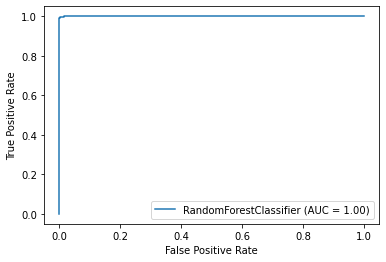

In [7]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)